In [43]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
def weekday_word(weekday):
    if weekday==0:
        return "Monday"
    elif weekday==1:
        return "Tuesday"
    elif weekday==2:
        return "Wednesday"
    elif weekday==3:
        return "Thursday"
    elif weekday==4:
        return "Friday"
    elif weekday==5:
        return "Saturday"
    else:
        return "Sunday"
    
def is_weekend(weekday):
    return weekday in [5,6]

In [45]:
f=pd.read_csv(r"C:\Users\Bruger\OneDrive - Danmarks Tekniske Universitet\Dokumenter\00- Introduction to Business Analytics\Project\Trips_2018.csv")

In [46]:
f.describe()

,Unnamed: 0,tripduration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender
count,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754584e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07,1.754834e+07
mean,8.774169e+06,9.887432e+02,1.589282e+03,4.073737e+01,-7.398260e+01,1.580830e+03,4.073704e+01,-7.398281e+01,2.656141e+04,1.978993e+03,1.148613e+00
std,5.065769e+06,1.889584e+04,1.439432e+03,3.225813e-02,1.912753e-02,1.438502e+03,3.206583e-02,1.919611e-02,6.222916e+03,1.192922e+01,5.438043e-01
min,0.000000e+00,6.100000e+01,7.200000e+01,4.064654e+01,-7.402535e+01,7.200000e+01,4.064654e+01,-7.408364e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,4.387084e+06,3.580000e+02,3.800000e+02,4.071755e+01,-7.399521e+01,3.800000e+02,4.071755e+01,-7.399595e+01,2.029300e+04,1.969000e+03,1.000000e+00
50%,8.774169e+06,6.050000e+02,5.050000e+02,4.073818e+01,-7.398565e+01,5.050000e+02,4.073756e+01,-7.398602e+01,2.827000e+04,1.981000e+03,1.000000e+00
75%,1.316125e+07,1.060000e+03,3.249000e+03,4.075763e+01,-7.397283e+01,3.249000e+03,4.075725e+01,-7.397344e+01,3.185200e+04,1.989000e+03,1.000000e+00
max,1.754834e+07,1.951005e+07,3.721000e+03,4.550636e+01,-7.356891e+01,3.721000e+03,4.550636e+01,-7.356891e+01,3.583100e+04,2.002000e+03,2.000000e+00


In [47]:

f['starttime'] = pd.to_datetime(f['starttime'], format='%Y-%m-%d %H:%M:%S.%f')
f['stoptime'] = pd.to_datetime(f['stoptime'], format='%Y-%m-%d %H:%M:%S.%f')
f['weekday']= f['starttime'].dt.weekday
f['is_weekend']=[is_weekend(el) for el in f['weekday']]
sm_dummies=pd.get_dummies(f, columns=['usertype'])

In [48]:
f.dtypes

Unnamed: 0                          int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
usertype                           object
birth_year                          int64
gender                              int64
weekday                             int64
is_weekend                           bool
dtype: object

In [49]:
sm_dummies.dtypes

Unnamed: 0                          int64
tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start_station_id                  float64
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_latitude              float64
end_station_longitude             float64
bikeid                              int64
birth_year                          int64
gender                              int64
weekday                             int64
is_weekend                           bool
usertype_Customer                   uint8
usertype_Subscriber                 uint8
dtype: object

# Clustering

In [50]:
new_df = f.drop_duplicates(subset='start_station_id')[['start_station_id', 'start_station_latitude', 'start_station_longitude']]
new_df = new_df.set_index("start_station_id")

In [51]:
x=new_df[['start_station_longitude', 'start_station_latitude']]
len(x)

819

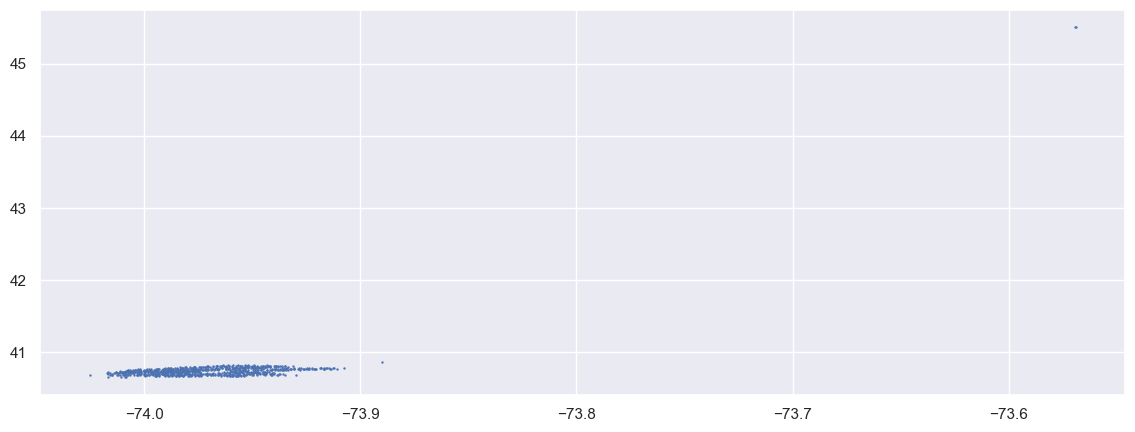

In [52]:
plt.scatter(x['start_station_longitude'],x['start_station_latitude'],s=0.5)

## DBScan

In [53]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(min_samples=30, eps=0.009) 
dbs.fit(x)

DBSCAN(eps=0.009, min_samples=30)

In [54]:
dbs.labels_

array([-1,  0,  0,  1,  1, -1,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  1,  0,  0,  0,  1,  1,
       -1,  1, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  1,  1,
        0,  0,  0,  0,  0, -1,  1, -1,  0,  1,  0,  0,  0, -1,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0,  0,
       -1,  1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  1,  1,  1,  0,  0,
       -1,  1,  1, -1,  0,  0,  0,  0,  0,  1,  1,  0, -1,  0,  0,  0, -1,
        0,  1,  0, -1, -1,  1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,
       -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0, -1,  0, -1,  0,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0, -1

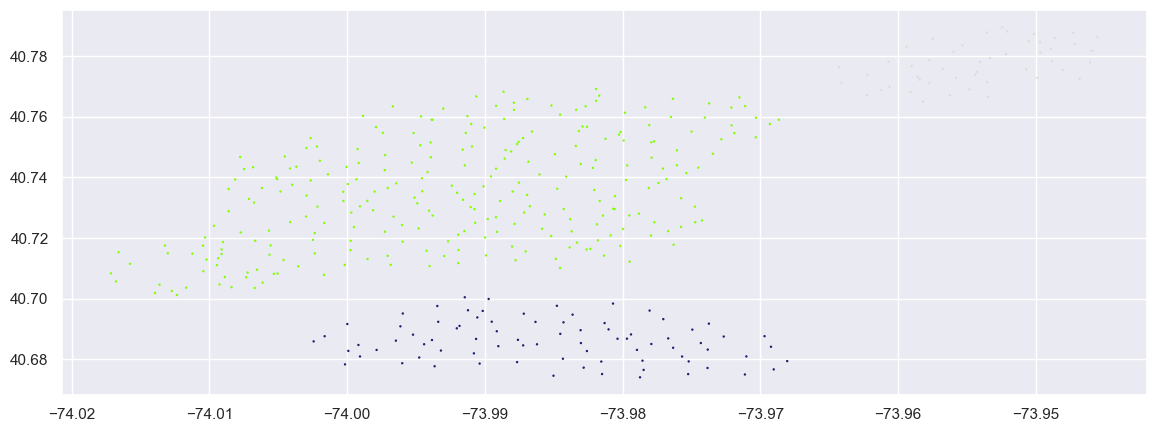

In [55]:
import random
from matplotlib import colors as mcolors

num_colors=len(set(dbs.labels_))-1   #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.CSS4_COLORS.keys())  #found this by searching "python color list"
cluster_colors=random.choices(colors, k=num_colors)
x_=[]
y_=[]
c_=[]
for label, x_val, y_val in zip(dbs.labels_, x['start_station_longitude'], x['start_station_latitude']):
    if label==-1:
        continue
    x_.append(x_val)
    y_.append(y_val)
    c_.append(cluster_colors[label])
#plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=0.5,c=c_)
plt.show()

## K-means

In [56]:
from sklearn.cluster import KMeans
K=20
k=KMeans(K)


In [57]:
k.fit(new_df)

KMeans(n_clusters=20)

In [58]:
dt_clusters=new_df.copy()
dt_clusters['cluster']=k.fit_predict(new_df)

In [59]:
dt_clusters

,start_station_latitude,start_station_longitude,cluster
start_station_id,,,
72.0,40.767272,-73.993929,9
79.0,40.719116,-74.006667,7
82.0,40.711174,-74.000165,7
83.0,40.683826,-73.976323,3
119.0,40.696089,-73.978034,3
...,...,...,...
3716.0,40.753599,-73.937956,8
3718.0,40.727464,-73.979504,10
3719.0,40.683223,-73.973812,16


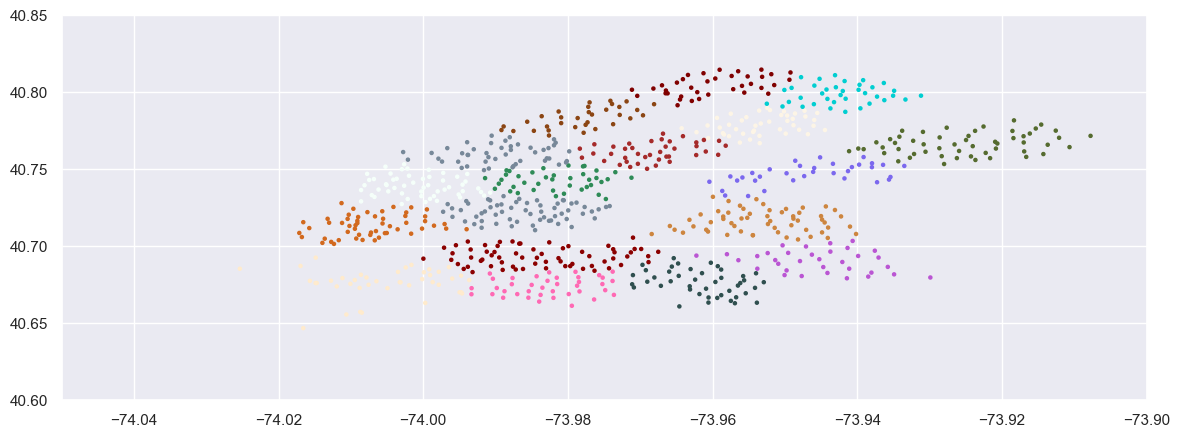

In [60]:
num_colors=K  #it's the number of different labels except for 1 (the -1 label)
colors=list(mcolors.CSS4_COLORS.keys())  #found this by searching "python color list"
cluster_colors = random.choices(colors,k=K)  

x_points=dt_clusters["start_station_longitude"]
y_points=dt_clusters["start_station_latitude"]
# Get labels and cluster centers
labels = dt_clusters["cluster"]
x_=[]
y_=[]
c_=[]
for label, x, y in zip(labels, x_points, y_points):
    if label==-1:
        continue
    x_.append(x)
    y_.append(y)
    c_.append(cluster_colors[label])
#plt.figure(figsize=(18, 12))
plt.scatter(x_,y_,s=5,c=c_)
plt.xlim(-74.05,-73.9)
plt.ylim(40.6,40.85)
plt.show()

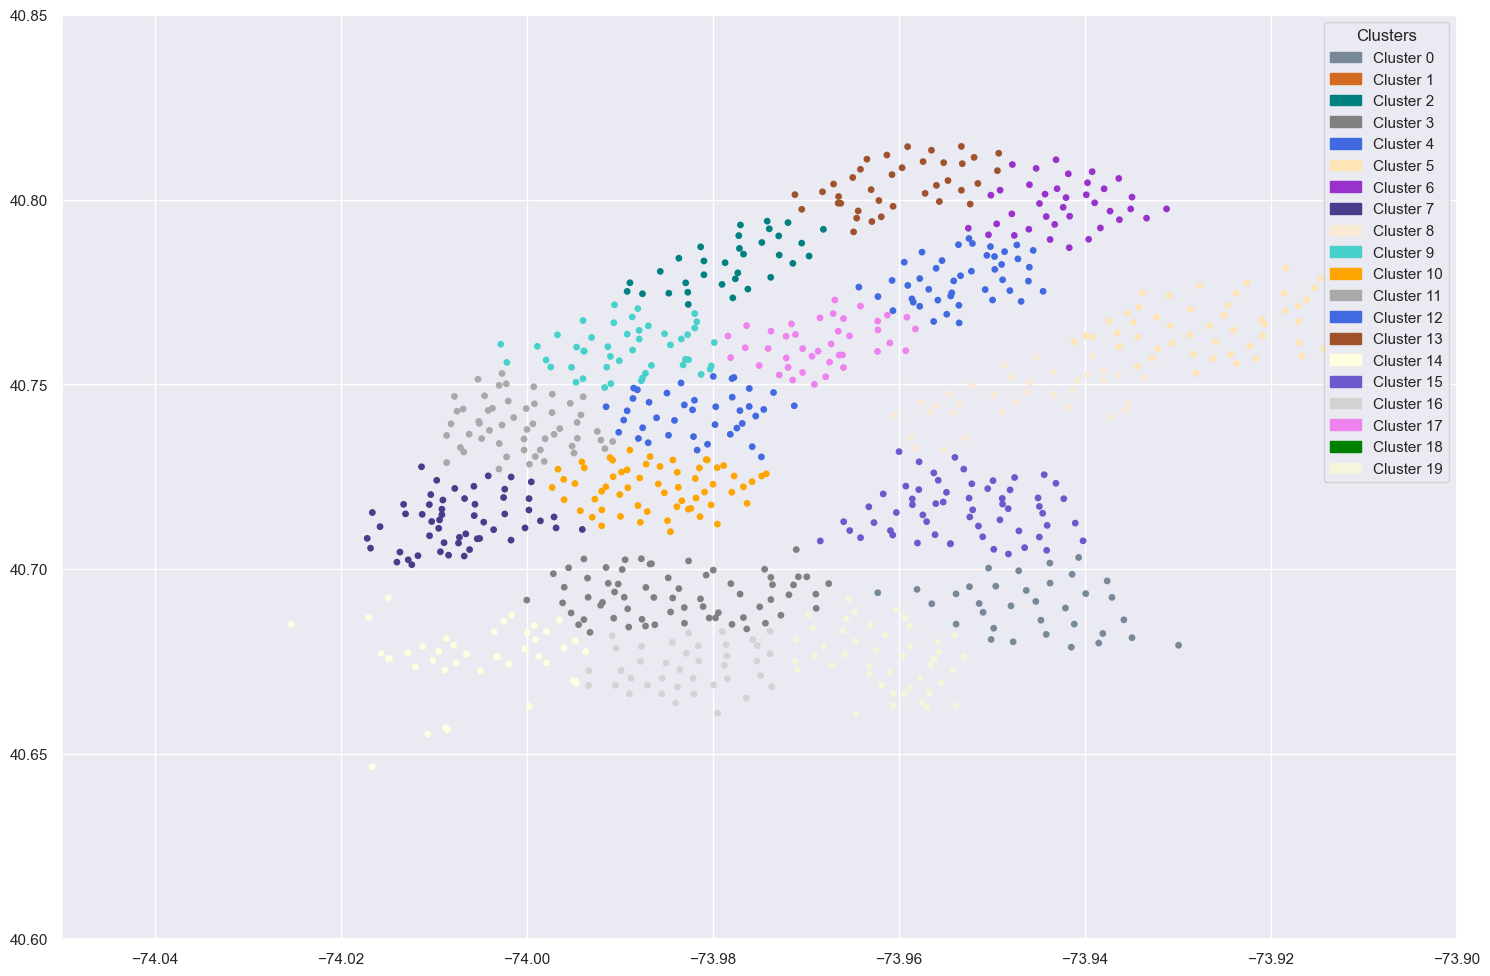

In [61]:
import matplotlib.patches as mpatches
import random

num_colors = K  # number of clusters excluding -1
colors = list(mcolors.CSS4_COLORS.keys())
cluster_colors = random.choices(colors, k=num_colors)

x_points = dt_clusters["start_station_longitude"]
y_points = dt_clusters["start_station_latitude"]
labels = dt_clusters["cluster"]

x_ = []
y_ = []
c_ = []

for label, x, y in zip(labels, x_points, y_points):
    if label == -1:
        continue
    x_.append(x)
    y_.append(y)
    c_.append(cluster_colors[label])

plt.figure(figsize=(18, 12))
plt.scatter(x_, y_, s=15, c=c_)

# Set axis limits
plt.xlim(-74.05, -73.9)
plt.ylim(40.6, 40.85)

# Create legend patches
legend_patches = [
    mpatches.Patch(color=cluster_colors[i], label=f'Cluster {i}')
    for i in range(num_colors)
]
plt.legend(handles=legend_patches, title="Clusters", loc="upper right")

plt.show()


# Connect clusters with the 17 mio data frame

In [62]:
df_merged = f.merge(
    dt_clusters[['cluster']], 
    left_on='start_station_id', 
    right_index=True, 
    how='left'
)
df_merged = df_merged.drop(columns=['Unnamed: 0'])


In [63]:
df_merged[df_merged["cluster"]==12]

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster
501328,927,2018-01-01 06:47:25.046,2018-01-01 07:02:53.044,3135.0,40.771129,-73.957723,527.0,40.744023,-73.976056,31173,Subscriber,1983,2,0,False,12
501329,601,2018-01-01 13:04:02.236,2018-01-01 13:14:03.417,3135.0,40.771129,-73.957723,3305.0,40.781122,-73.949656,31023,Subscriber,1984,1,0,False,12
501330,381,2018-01-01 13:33:48.888,2018-01-01 13:40:10.013,3135.0,40.771129,-73.957723,3137.0,40.772828,-73.966853,33034,Subscriber,1992,1,0,False,12
501331,317,2018-01-01 13:34:59.793,2018-01-01 13:40:17.001,3135.0,40.771129,-73.957723,3137.0,40.772828,-73.966853,32728,Subscriber,1992,2,0,False,12
501332,149,2018-01-01 17:29:08.082,2018-01-01 17:31:37.541,3135.0,40.771129,-73.957723,3378.0,40.773763,-73.962221,27997,Subscriber,1988,1,0,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548070,201,2018-12-31 20:55:00.212,2018-12-31 20:58:22.128,3318.0,40.783964,-73.947167,3425.0,40.789211,-73.943708,34062,Subscriber,1973,1,0,False,12
17548195,1680,2018-12-31 22:13:28.282,2018-12-31 22:41:29.080,3135.0,40.771129,-73.957723,3171.0,40.785247,-73.976673,35785,Customer,1991,1,0,False,12
17548198,311,2018-12-31 22:17:18.881,2018-12-31 22:22:30.343,3288.0,40.778301,-73.948813,3675.0,40.784597,-73.949685,35391,Subscriber,1987,1,0,False,12
17548290,360,2018-12-31 23:17:25.794,2018-12-31 23:23:26.025,3140.0,40.771404,-73.953517,3137.0,40.772828,-73.966853,29906,Subscriber,1989,1,0,False,12


# Investigating a cluster

In [88]:
cluster_12 = df_merged[df_merged["cluster"]==12]

In [89]:
cluster_12 = cluster_12.copy()
cluster_12.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster,date,hour
501328,927,2018-01-01 06:47:25.046,2018-01-01 07:02:53.044,3135.0,40.771129,-73.957723,527.0,40.744023,-73.976056,31173,Subscriber,1983,2,0,False,12,2018-01-01,6
501329,601,2018-01-01 13:04:02.236,2018-01-01 13:14:03.417,3135.0,40.771129,-73.957723,3305.0,40.781122,-73.949656,31023,Subscriber,1984,1,0,False,12,2018-01-01,13
501330,381,2018-01-01 13:33:48.888,2018-01-01 13:40:10.013,3135.0,40.771129,-73.957723,3137.0,40.772828,-73.966853,33034,Subscriber,1992,1,0,False,12,2018-01-01,13
501331,317,2018-01-01 13:34:59.793,2018-01-01 13:40:17.001,3135.0,40.771129,-73.957723,3137.0,40.772828,-73.966853,32728,Subscriber,1992,2,0,False,12,2018-01-01,13
501332,149,2018-01-01 17:29:08.082,2018-01-01 17:31:37.541,3135.0,40.771129,-73.957723,3378.0,40.773763,-73.962221,27997,Subscriber,1988,1,0,False,12,2018-01-01,17


# Data visualization for a cluster

In [104]:


# Make sure starttime is a datetime
cluster_12['starttime'] = pd.to_datetime(cluster_12['starttime'])

# Extract date and hour
cluster_12['date'] = cluster_12['starttime'].dt.date
cluster_12['hour'] = cluster_12['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour = cluster_12.groupby(['date', 'hour']).size().reset_index(name='num_trips')
trips_per_hour


,date,hour,num_trips
0,2018-01-01,0,7
1,2018-01-01,1,4
2,2018-01-01,2,2
3,2018-01-01,3,1
4,2018-01-01,4,2
...,...,...,...
8525,2018-12-31,18,24
8526,2018-12-31,19,5
8527,2018-12-31,20,9
8528,2018-12-31,22,2


In [ ]:

trips_per_hour['datetime'] = pd.to_datetime(trips_per_hour['date'].astype(str)) + pd.to_timedelta(trips_per_hour['hour'], unit='h')
trips_per_hour.set_index('datetime', inplace=True)
trips_per_hour.drop(columns=['date'], inplace=True)
trips_per_hour.head()



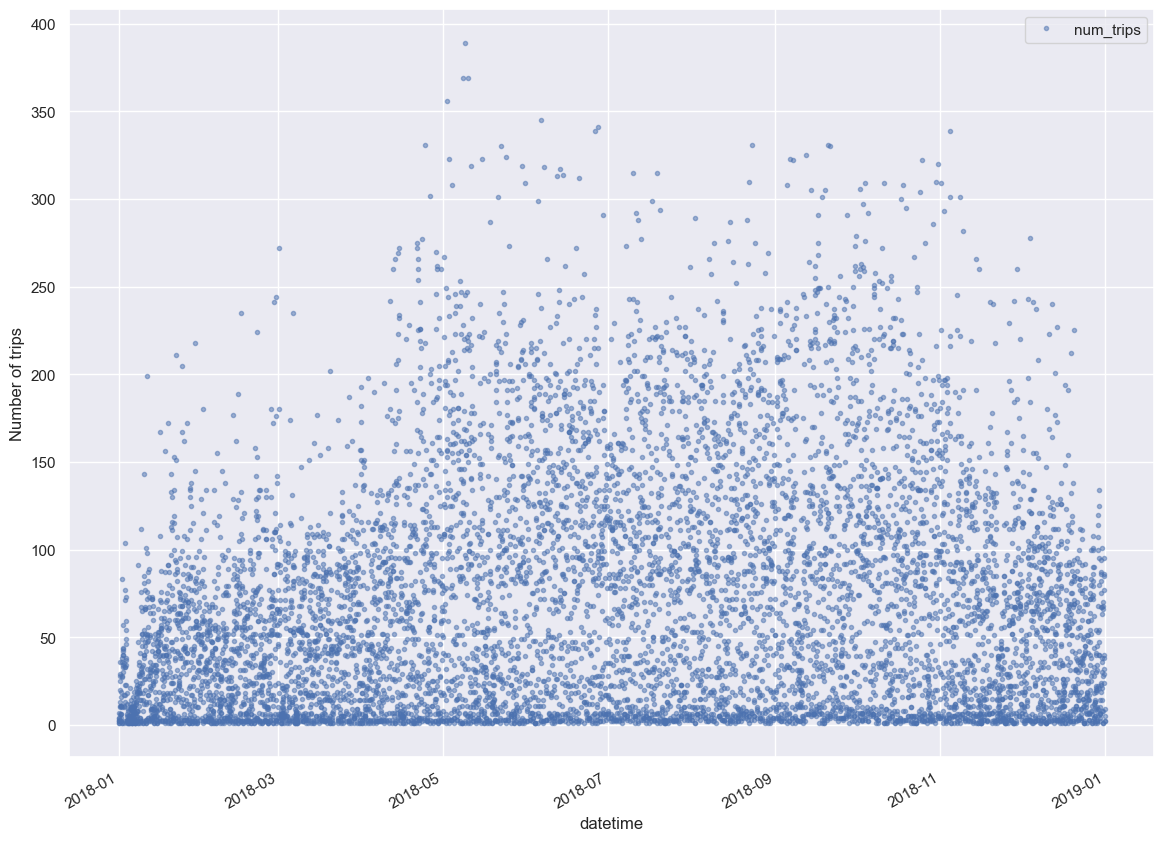

In [67]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 5)})
cols_plot = ['num_trips']
axes = trips_per_hour[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 11), subplots=True)
for ax in axes:
    ax.set_ylabel('Number of trips')

Text(0, 0.5, 'number of trips')

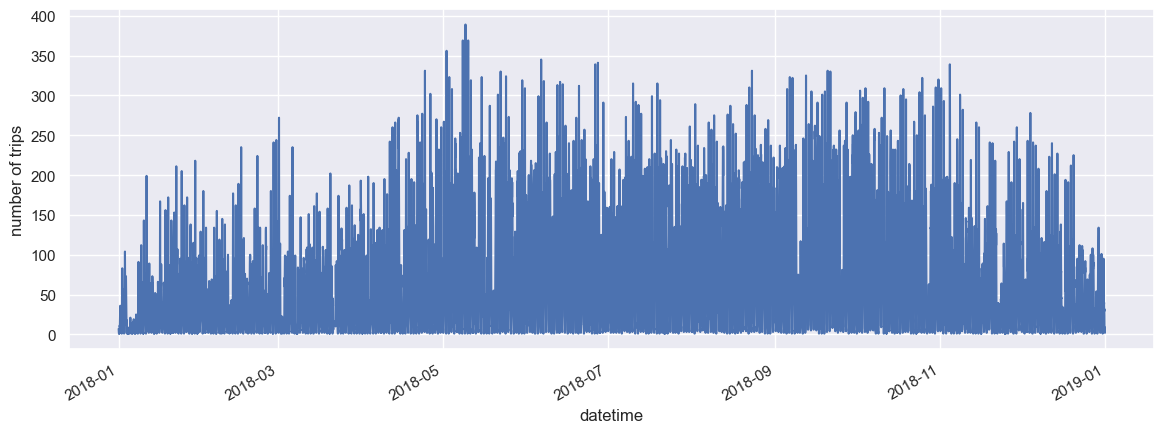

In [68]:
ax = trips_per_hour.loc['2018', 'num_trips'].plot()
ax.set_ylabel('number of trips')

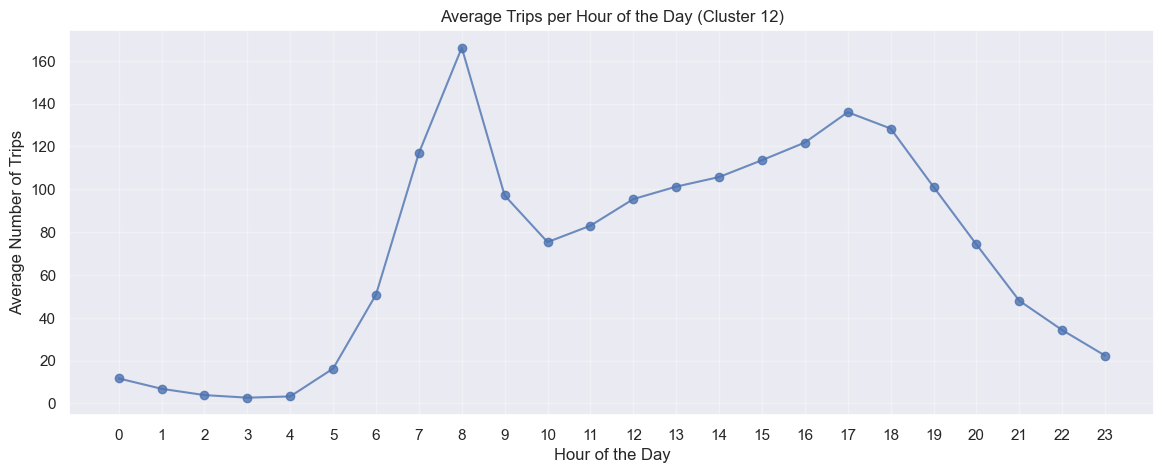

In [69]:
# Average trips per hour (0-23) across all days
avg_trips_by_hour = trips_per_hour.groupby('hour')['num_trips'].mean()
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14, 5)})

# Plot average trips by hour
avg_trips_by_hour.plot(marker='o', linestyle='-', alpha=0.8)

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour of the Day (Cluster 12)')
plt.xticks(range(0,24))  # ensure all hours are labeled
plt.grid(True, alpha=0.3)
plt.show()


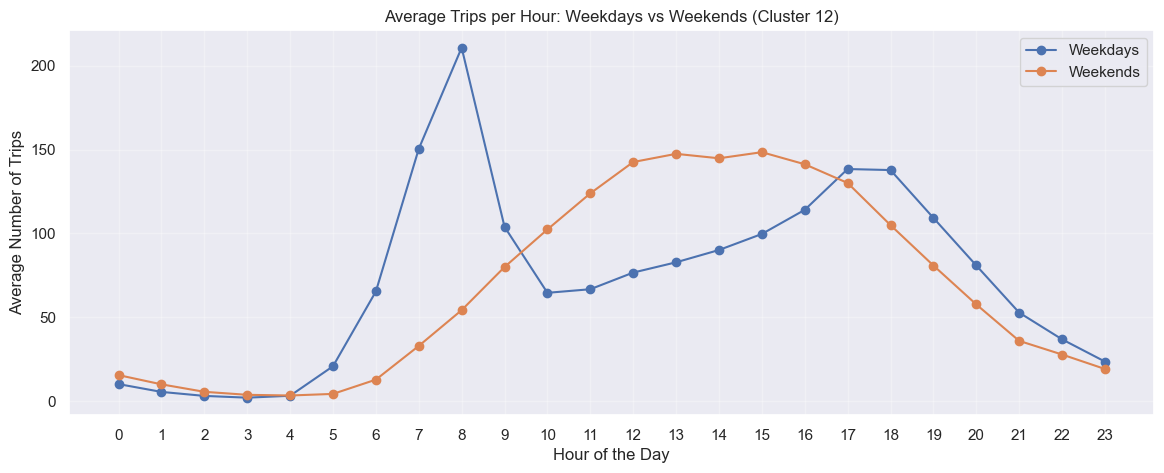

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract hour from datetime index if not already present
trips_per_hour['hour'] = trips_per_hour.index.hour
trips_per_hour['is_weekend'] = trips_per_hour.index.weekday >= 5

# Average trips per hour for weekdays
avg_weekday = trips_per_hour[~trips_per_hour['is_weekend']].groupby('hour')['num_trips'].mean()

# Average trips per hour for weekends
avg_weekend = trips_per_hour[trips_per_hour['is_weekend']].groupby('hour')['num_trips'].mean()

# Plot
sns.set(rc={'figure.figsize':(14,5)})
plt.plot(avg_weekday.index, avg_weekday.values, marker='o', linestyle='-', label='Weekdays')
plt.plot(avg_weekend.index, avg_weekend.values, marker='o', linestyle='-', label='Weekends')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour: Weekdays vs Weekends (Cluster 12)')
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.legend()
plt.show()


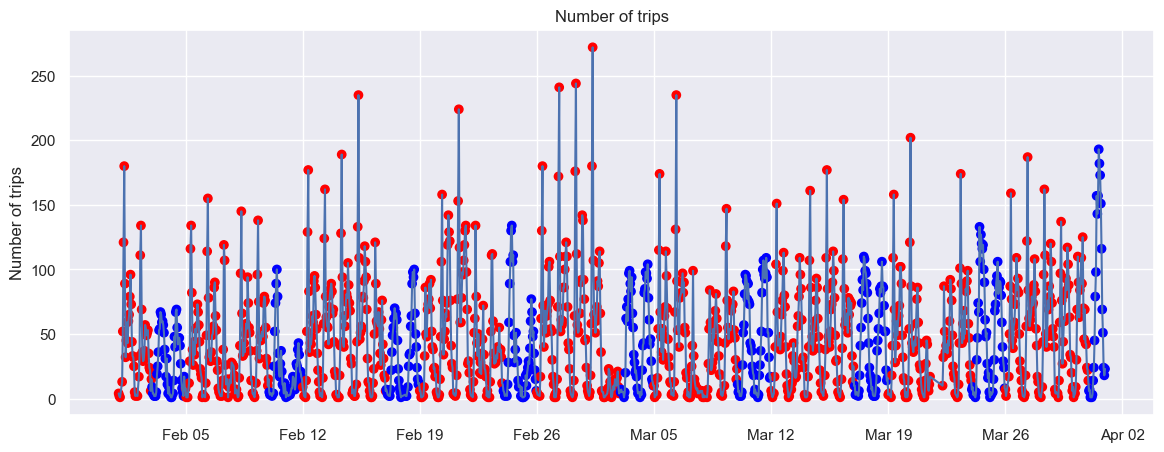

In [71]:
import matplotlib.dates as mdates
weekends=trips_per_hour.loc['2018-02':'2018-03', 'num_trips'].index.weekday>=5
colors=['blue' if x else 'red' for x in weekends]
fig, ax = plt.subplots()
ax.plot(trips_per_hour.loc['2018-02':'2018-03', 'num_trips'])
ax.scatter(trips_per_hour.loc['2018-02':'2018-03'].index, trips_per_hour.loc['2018-02':'2018-03', 'num_trips'], marker='o', linestyle='-', c=colors)
ax.set_ylabel('Number of trips')
ax.set_title('Number of trips')

# To better visualize the weekly seasonality in electricity consumption 
# we add vertical gridlines on a weekly time scale

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

# Investigating all the data

In [72]:


# Make sure starttime is a datetime
df_merged['starttime'] = pd.to_datetime(df_merged['starttime'])

# Extract date and hour
df_merged['date'] = df_merged['starttime'].dt.date
df_merged['hour'] = df_merged['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour_all = df_merged.groupby(['date', 'hour']).size().reset_index(name='num_trips')

trips_per_hour_all['datetime'] = pd.to_datetime(trips_per_hour_all['date'].astype(str)) + pd.to_timedelta(trips_per_hour_all['hour'], unit='h')
trips_per_hour_all.set_index('datetime', inplace=True)
trips_per_hour_all.drop(columns=['date'], inplace=True)

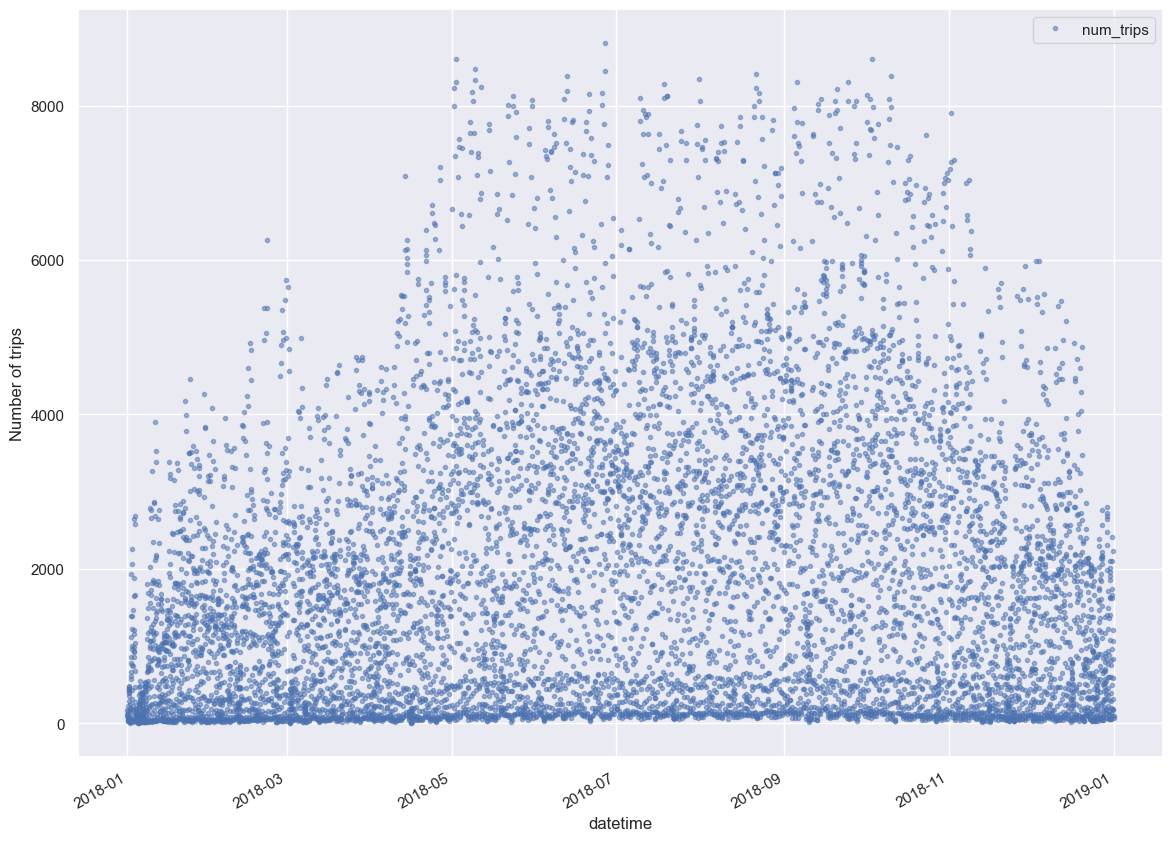

In [73]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14, 5)})
cols_plot = ['num_trips']
axes = trips_per_hour_all[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14, 11), subplots=True)
for ax in axes:
    ax.set_ylabel('Number of trips')

Text(0, 0.5, 'number of trips')

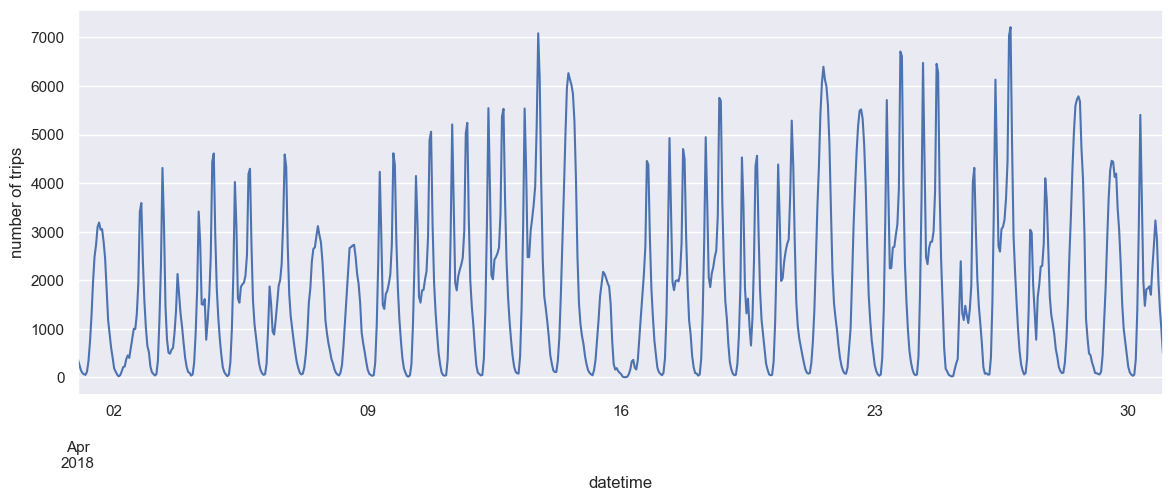

In [74]:
ax = trips_per_hour_all.loc['2018-04', 'num_trips'].plot()
ax.set_ylabel('number of trips')

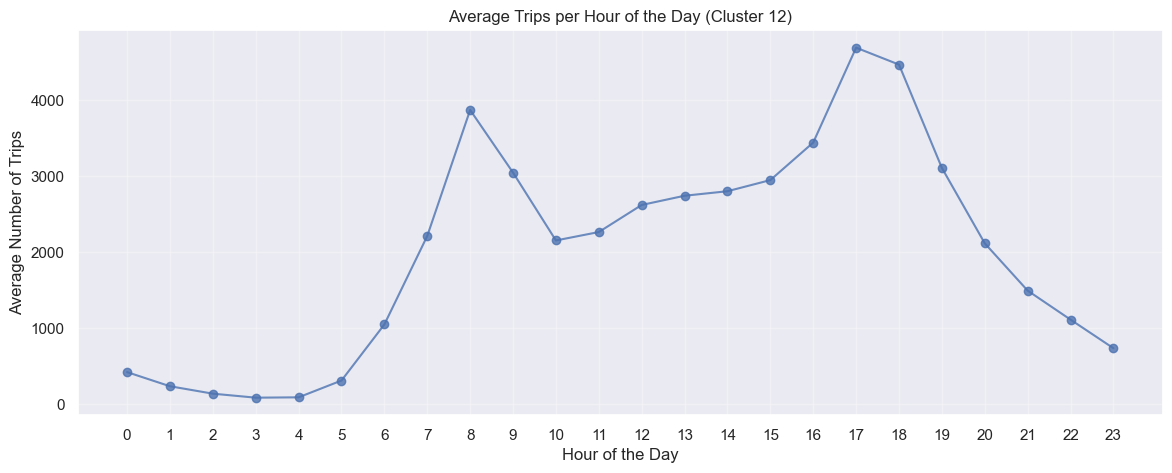

In [75]:
# Average trips per hour (0-23) across all days
avg_trips_by_hour_all = trips_per_hour_all.groupby('hour')['num_trips'].mean()
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14, 5)})

# Plot average trips by hour
avg_trips_by_hour_all.plot(marker='o', linestyle='-', alpha=0.8)

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour of the Day (Cluster 12)')
plt.xticks(range(0,24))  # ensure all hours are labeled
plt.grid(True, alpha=0.3)
plt.show()

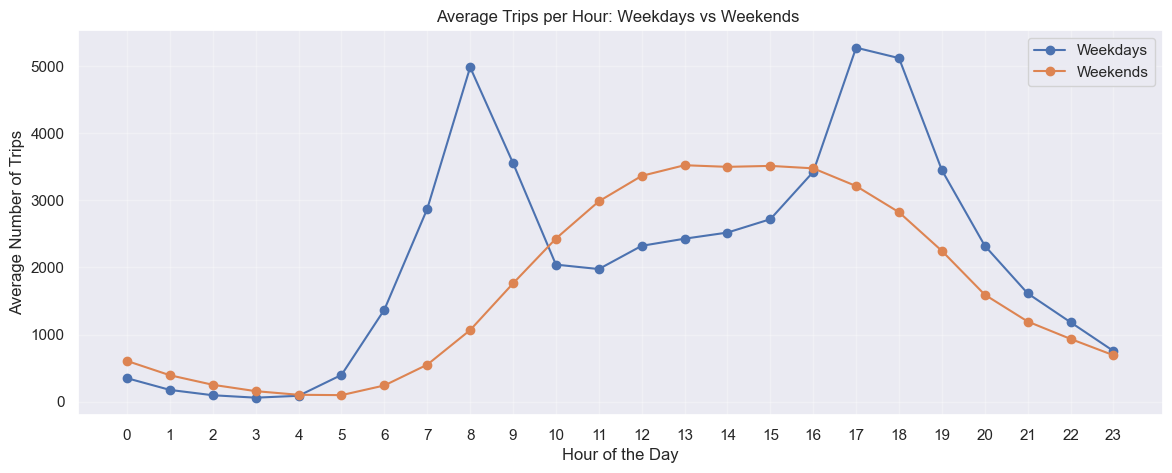

In [76]:

# Extract hour from datetime index if not already present
trips_per_hour_all['hour'] = trips_per_hour_all.index.hour
trips_per_hour_all['is_weekend'] = trips_per_hour_all.index.weekday >= 5

# Average trips per hour for weekdays
avg_weekday = trips_per_hour_all[~trips_per_hour_all['is_weekend']].groupby('hour')['num_trips'].mean()

# Average trips per hour for weekends
avg_weekend = trips_per_hour_all[trips_per_hour_all['is_weekend']].groupby('hour')['num_trips'].mean()

# Plot
sns.set(rc={'figure.figsize':(14,5)})
plt.plot(avg_weekday.index, avg_weekday.values, marker='o', linestyle='-', label='Weekdays')
plt.plot(avg_weekend.index, avg_weekend.values, marker='o', linestyle='-', label='Weekends')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Trips')
plt.title('Average Trips per Hour: Weekdays vs Weekends ')
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.legend()
plt.show()

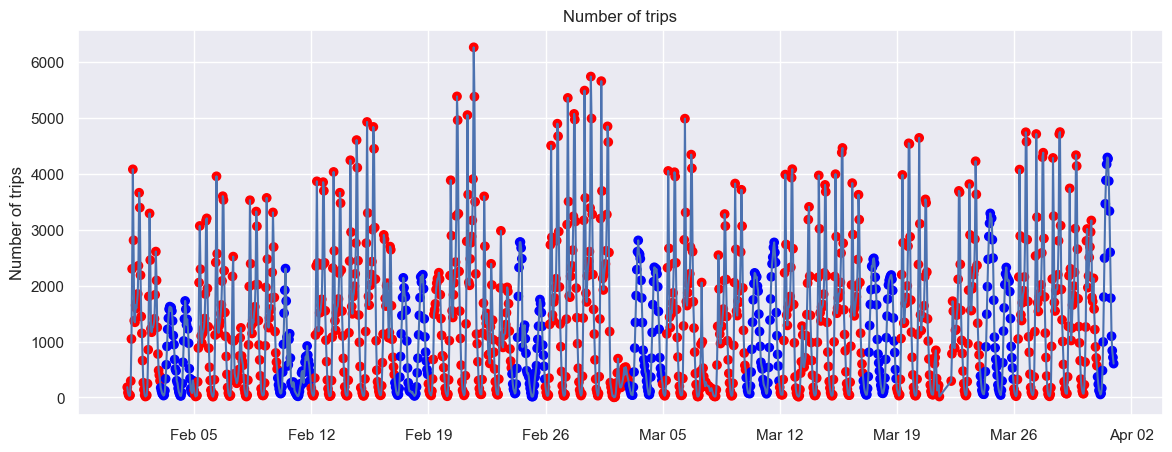

In [77]:
weekends=trips_per_hour_all.loc['2018-02':'2018-03', 'num_trips'].index.weekday>=5
colors=['blue' if x else 'red' for x in weekends]
fig, ax = plt.subplots()
ax.plot(trips_per_hour_all.loc['2018-02':'2018-03', 'num_trips'])
ax.scatter(trips_per_hour_all.loc['2018-02':'2018-03'].index, trips_per_hour_all.loc['2018-02':'2018-03', 'num_trips'], marker='o', linestyle='-', c=colors)
ax.set_ylabel('Number of trips')
ax.set_title('Number of trips')

# To better visualize the weekly seasonality in electricity consumption 
# we add vertical gridlines on a weekly time scale

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

In [78]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(trips_per_hour_all['num_trips'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.133164
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


# Exploring seasonality in all the data

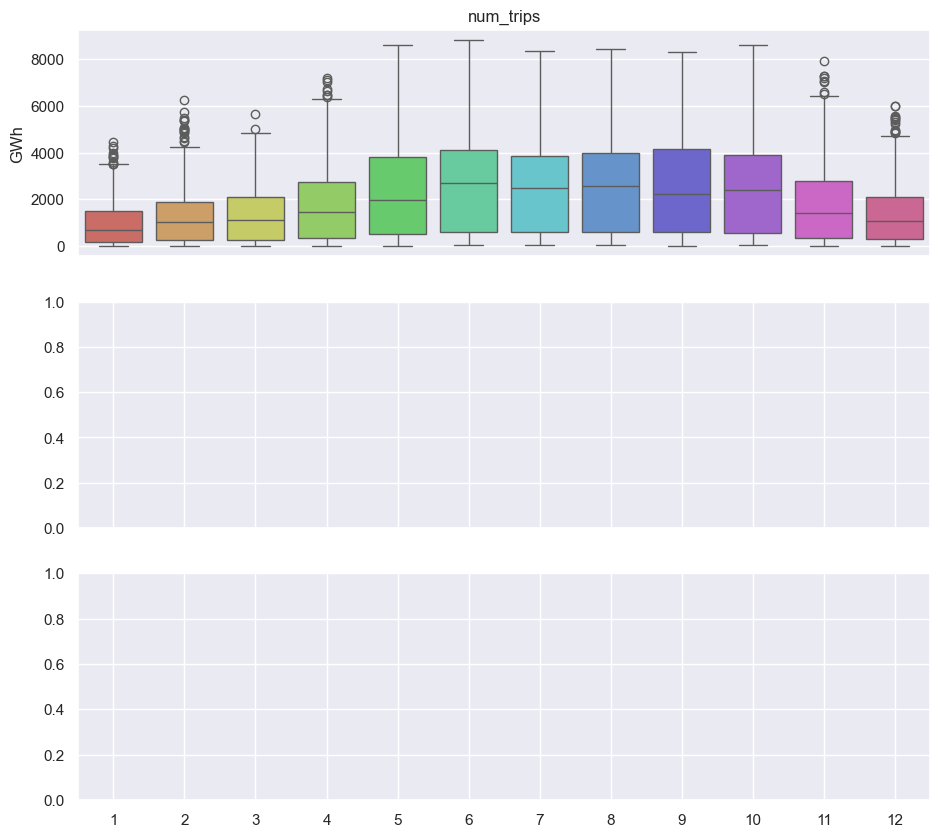

In [79]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
trips_per_hour_all['Month'] = trips_per_hour_all.index.month
for name, ax in zip(['num_trips'], axes):
    sns.boxplot(data=trips_per_hour_all, x='Month', y=name, ax=ax, hue='Month',palette=sns.color_palette("hls", 12),legend=False)
    ax.set_ylabel('GWh')
    ax.set_title(name)
    # Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

<AxesSubplot:xlabel='hour', ylabel='num_trips'>

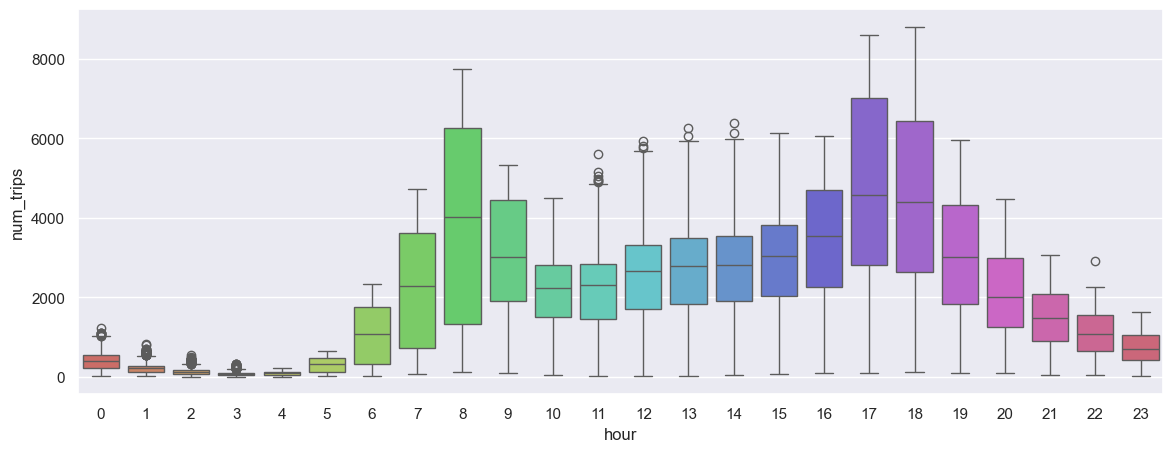

In [80]:
sns.boxplot(data=trips_per_hour_all, x='hour', y='num_trips',hue='hour',palette=sns.color_palette("hls", 24),legend=False)

# Rolling average

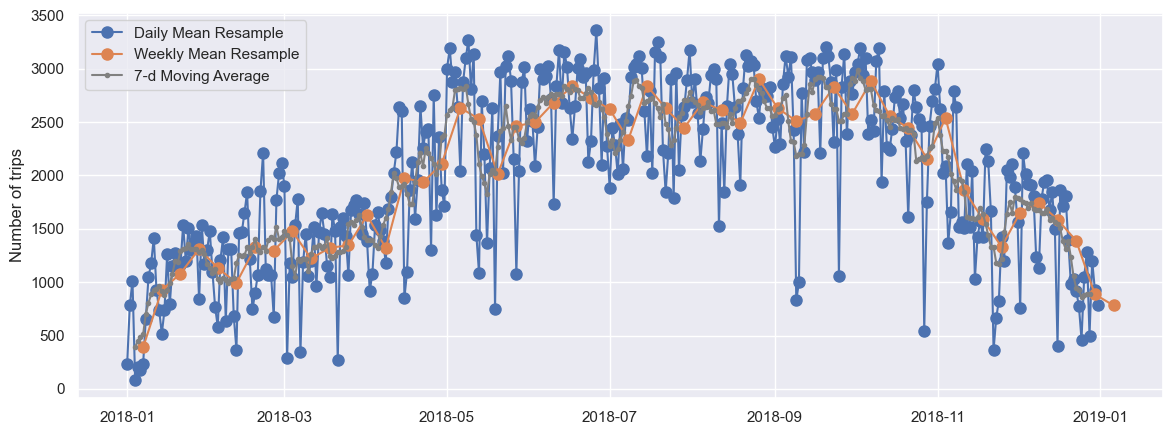

In [81]:
data_columns = ['num_trips']
opsd_daily_mean = trips_per_hour_all[data_columns].resample('D').mean()
opsd_daily_mean[:3]
opsd_weekly_mean = trips_per_hour_all[data_columns].resample('W').mean()
opsd_weekly_mean[:3]

opsd_7d = opsd_daily_mean[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

start, end = '2018-01', '2019-01'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily_mean.loc[start:end, 'num_trips'],
marker='o', markersize=8, linestyle='-', label='Daily Mean Resample')
ax.plot(opsd_weekly_mean.loc[start:end, 'num_trips'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'num_trips'],
marker='.', linestyle='-', label='7-d Moving Average', color="grey")
ax.set_ylabel('Number of trips')
ax.legend()

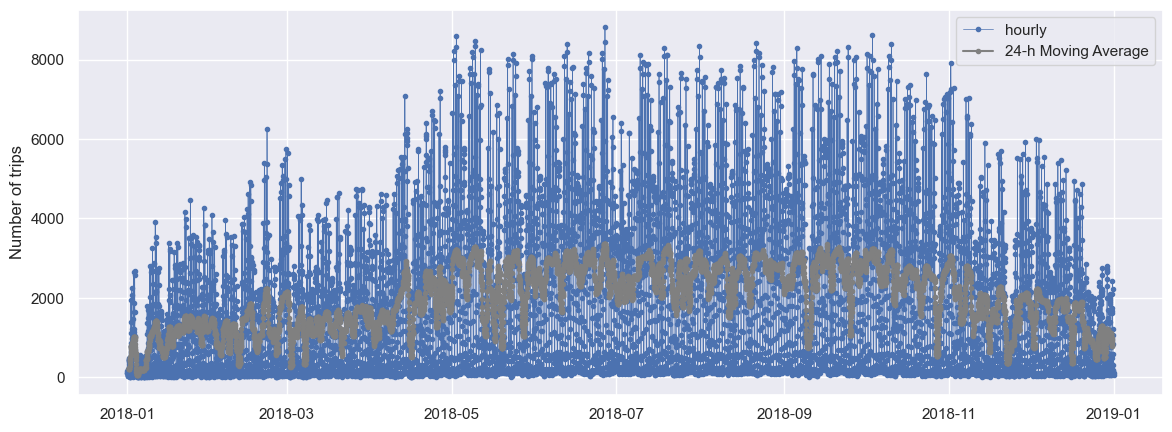

In [82]:

opsd_24h = trips_per_hour_all[data_columns].rolling(24, center=True).mean()
start, end = '2018-01', '2019-01'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(trips_per_hour_all.loc[start:end, 'num_trips'],
marker='.', linestyle='-', linewidth=0.5, label='hourly')
ax.plot(opsd_24h.loc[start:end, 'num_trips'],
marker='.', linestyle='-', label='24-h Moving Average', color="grey")
ax.set_ylabel('Number of trips')
ax.legend()

# Autocorrelation

In [83]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

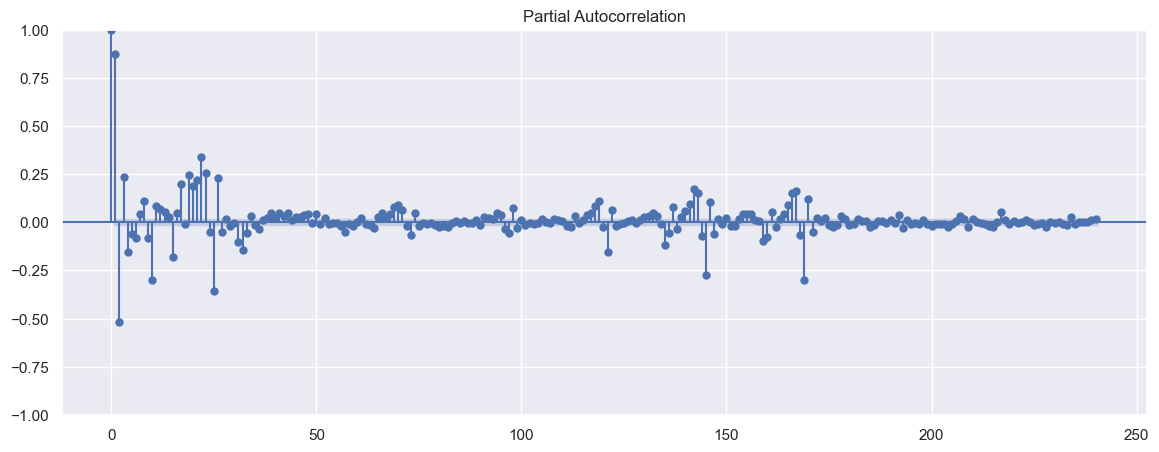

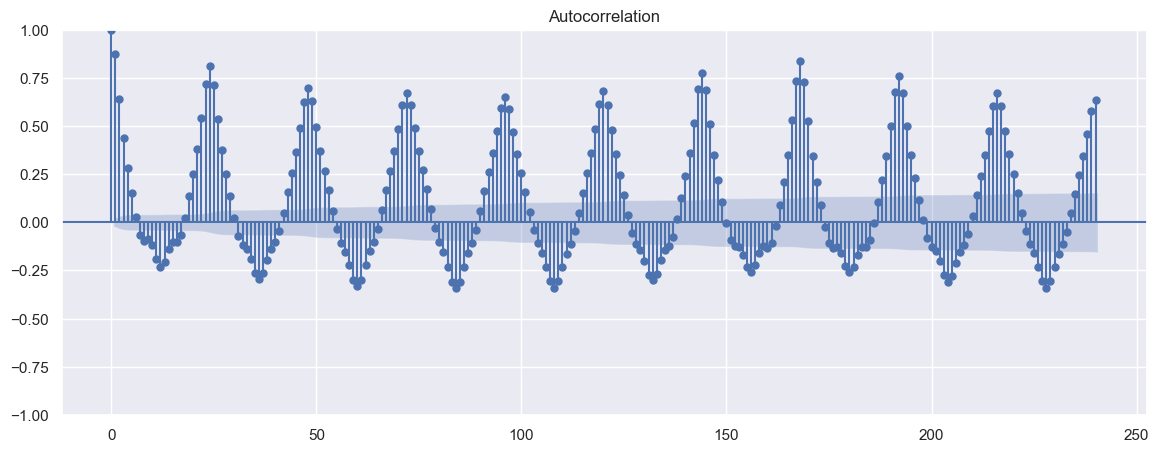

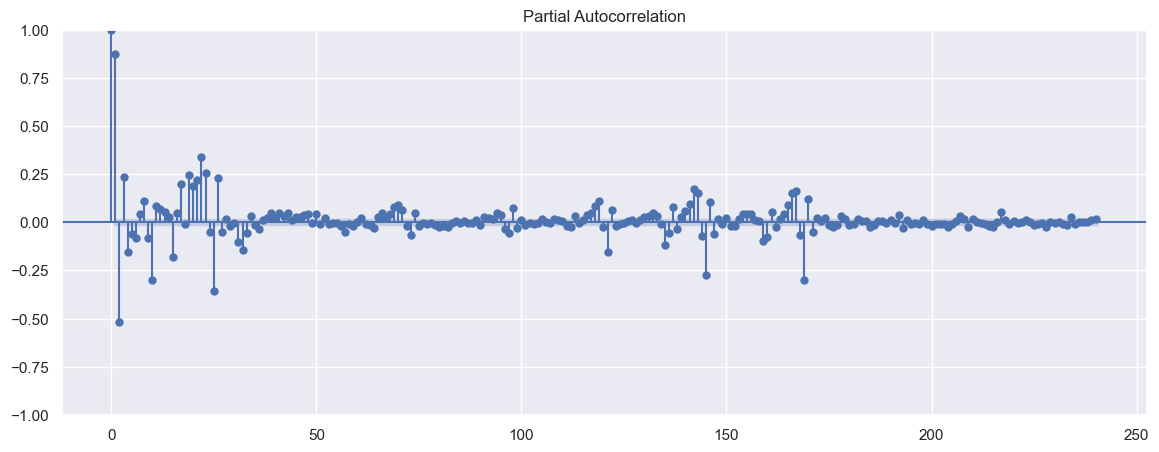

In [84]:
plot_acf(trips_per_hour_all['num_trips'],lags=10*24) # lags valgt udfra 10 dage gnage 24 timer
plot_pacf(trips_per_hour_all['num_trips'],lags=10*24)

# Further investigation of what variables to keep for our prediction model

We discussed: leaving out starttime, stoptime, and longitude and latitude for both end station and startstation. The spatial because we now just care which cluster we are in, therefore also leave out the stations ID. Starttime is relevant stop time not su much because we try to predict demand. ANd the trip duration will be kept, also weekend, birth year, most common usertype, and most common gender. Bike ID have also been left out as it seems irrelevant to know which bike goes where at this point. 

In [94]:


# Make sure starttime is a datetime
cluster_12['starttime'] = pd.to_datetime(cluster_12['starttime'])

# Extract date and hour
cluster_12['date'] = cluster_12['starttime'].dt.date
cluster_12['hour'] = cluster_12['starttime'].dt.hour

# Group by date and hour, count trips
trips_per_hour = cluster_12.groupby(['date', 'hour'])
trips_per_hour.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster,date,hour
501328,927,2018-01-01 06:47:25.046,2018-01-01 07:02:53.044,3135.0,40.771129,-73.957723,527.0,40.744023,-73.976056,31173,Subscriber,1983,2,0,False,12,2018-01-01,6
501329,601,2018-01-01 13:04:02.236,2018-01-01 13:14:03.417,3135.0,40.771129,-73.957723,3305.0,40.781122,-73.949656,31023,Subscriber,1984,1,0,False,12,2018-01-01,13
501330,381,2018-01-01 13:33:48.888,2018-01-01 13:40:10.013,3135.0,40.771129,-73.957723,3137.0,40.772828,-73.966853,33034,Subscriber,1992,1,0,False,12,2018-01-01,13
501331,317,2018-01-01 13:34:59.793,2018-01-01 13:40:17.001,3135.0,40.771129,-73.957723,3137.0,40.772828,-73.966853,32728,Subscriber,1992,2,0,False,12,2018-01-01,13
501332,149,2018-01-01 17:29:08.082,2018-01-01 17:31:37.541,3135.0,40.771129,-73.957723,3378.0,40.773763,-73.962221,27997,Subscriber,1988,1,0,False,12,2018-01-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17547962,1475,2018-12-31 20:16:20.648,2018-12-31 20:40:56.634,3370.0,40.772797,-73.955778,498.0,40.748549,-73.988084,35436,Subscriber,1993,1,0,False,12,2018-12-31,20
17548195,1680,2018-12-31 22:13:28.282,2018-12-31 22:41:29.080,3135.0,40.771129,-73.957723,3171.0,40.785247,-73.976673,35785,Customer,1991,1,0,False,12,2018-12-31,22
17548198,311,2018-12-31 22:17:18.881,2018-12-31 22:22:30.343,3288.0,40.778301,-73.948813,3675.0,40.784597,-73.949685,35391,Subscriber,1987,1,0,False,12,2018-12-31,22
17548290,360,2018-12-31 23:17:25.794,2018-12-31 23:23:26.025,3140.0,40.771404,-73.953517,3137.0,40.772828,-73.966853,29906,Subscriber,1989,1,0,False,12,2018-12-31,23


In [98]:

cluster_12.index.name = 'trip_id'
cluster_12

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,weekday,is_weekend,cluster,date,hour
trip_id,,,,,,,,,,,,,,,,,,
501328,927,2018-01-01 06:47:25.046,2018-01-01 07:02:53.044,3135.0,40.771129,-73.957723,527.0,40.744023,-73.976056,31173,Subscriber,1983,2,0,False,12,2018-01-01,6
501329,601,2018-01-01 13:04:02.236,2018-01-01 13:14:03.417,3135.0,40.771129,-73.957723,3305.0,40.781122,-73.949656,31023,Subscriber,1984,1,0,False,12,2018-01-01,13
501330,381,2018-01-01 13:33:48.888,2018-01-01 13:40:10.013,3135.0,40.771129,-73.957723,3137.0,40.772828,-73.966853,33034,Subscriber,1992,1,0,False,12,2018-01-01,13
501331,317,2018-01-01 13:34:59.793,2018-01-01 13:40:17.001,3135.0,40.771129,-73.957723,3137.0,40.772828,-73.966853,32728,Subscriber,1992,2,0,False,12,2018-01-01,13
501332,149,2018-01-01 17:29:08.082,2018-01-01 17:31:37.541,3135.0,40.771129,-73.957723,3378.0,40.773763,-73.962221,27997,Subscriber,1988,1,0,False,12,2018-01-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548070,201,2018-12-31 20:55:00.212,2018-12-31 20:58:22.128,3318.0,40.783964,-73.947167,3425.0,40.789211,-73.943708,34062,Subscriber,1973,1,0,False,12,2018-12-31,20
17548195,1680,2018-12-31 22:13:28.282,2018-12-31 22:41:29.080,3135.0,40.771129,-73.957723,3171.0,40.785247,-73.976673,35785,Customer,1991,1,0,False,12,2018-12-31,22
17548198,311,2018-12-31 22:17:18.881,2018-12-31 22:22:30.343,3288.0,40.778301,-73.948813,3675.0,40.784597,-73.949685,35391,Subscriber,1987,1,0,False,12,2018-12-31,22


In [108]:

grouped = (
    cluster_12.groupby(['date', 'hour'])
      .agg(
          trip_count=('tripduration', 'count'),
          is_weekend=('is_weekend', 'first'),
          most_common_user_type=('usertype', lambda x: x.value_counts().index[0]),
          most_common_gender=('gender', lambda x: x.value_counts().index[0]),
          duration_mean=('tripduration', 'mean'),
          duration_median=('tripduration', 'median'),
          duration_max=('tripduration', 'max'),
          birth_mean=('birth_year', 'mean')
      )
      .reset_index()
)


In [109]:
grouped

,date,hour,trip_count,is_weekend,most_common_user_type,most_common_gender,duration_mean,duration_median,duration_max,birth_mean
0,2018-01-01,0,7,False,Subscriber,1,584.142857,763.0,956,1979.428571
1,2018-01-01,1,4,False,Subscriber,1,285.500000,316.0,405,1983.500000
2,2018-01-01,2,2,False,Subscriber,1,266.000000,266.0,312,1974.000000
3,2018-01-01,3,1,False,Subscriber,1,988.000000,988.0,988,1986.000000
4,2018-01-01,4,2,False,Subscriber,1,182.000000,182.0,292,1992.000000
...,...,...,...,...,...,...,...,...,...,...
8525,2018-12-31,18,24,False,Subscriber,1,645.625000,420.0,2101,1978.916667
8526,2018-12-31,19,5,False,Subscriber,1,621.000000,373.0,1522,1982.600000
8527,2018-12-31,20,9,False,Subscriber,1,1082.555556,458.0,3585,1987.000000
8528,2018-12-31,22,2,False,Customer,1,995.500000,995.5,1680,1989.000000
